In [1]:
# Run this cell to set up your notebook

import numpy as np
from scipy import stats
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Week 8 Part 2 #

## Covariance and Sums ##

You know that $(x+y)w = xw + yw$. So also

$Cov(X+Y, W) = Cov(X, W) + Cov(Y, W)$.

The proof is routine algebra: just apply definition, expand products, and collect terms.

## Main Property of Covariance: Bilinearity ##
Covariance works just like a product, but remember that additive constants (shifts) don't affect it.

$Cov(aX+bY+c, dW+g) = Cov(aX+bY, dW) = adCov(X, W) + bdCov(Y, W)$.

This makes calculations easy. **Try it out (don't forget properties from Part 1):**

Suppose $Var(X) = 10$, $Var(Y) = 4$, and $Cov(X, Y) = -3$. Find $Cov(5X-Y, X+2Y-6)$.

In [5]:
# Cov(5X-Y, X+2Y-6)



You should get 15.

## Reading 1: Formal Statement of Bilinearity ##
Look carefully at the [formal result](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#The-Main-Property:-Bilinearity). 

## Exercises To Do Now ##
Before you proceed, you should do Exercises 2, 3, and 4 of [Review Set 3](http://prob140.org/textbook/Chapter_15/06_Review_Problems_Set_3.html). They are quick, and the results of 3 and 4 are interesting.

## Variance of a Sum ##

The main consequence of bilinearity is a compact formula for the variance of a sum.

You already know that $Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)$.

But you can now see this formula in a whole new light:

$$
\begin{align*}
Var(X+Y) ~ &= ~ Cov(X+Y, X+Y) \\
&= ~ Cov(X, X) + Cov(Y, Y) + Cov(X, Y) + Cov(Y, X)
\end{align*}
$$

Simply stated, the variance of a sum is the sum of all the covariances.

A simplification:

$$
Var(X+Y) ~ = ~ Var(X) + Var(Y) + Cov(X, Y) + Cov(Y, X)
$$

This leads to the most useful statement about variances of sums:

**The variance of a sum is the sum of all the variances as well as all the covariances.**

By induction (which we won't slog through), the formal result is

$$
Var(\sum_{i=1}^n X_i) ~ = ~ \sum_{i=1}^n Var(X_i) ~ + ~ \mathop{\sum\sum}_{1 \le i\ne j \le n} Cov(X_i, X_j)
$$

**Important:** The double sum includes $Cov(X_i, X_j)$ as well as $Cov(X_j, X_i)$ as separate terms. Of course their numerical values are the same. So the result above is sometimes written as

$$
Var(\sum_{i=1}^n X_i) ~ = ~ \sum_{i=1}^n Var(X_i) ~ + ~ 2\mathop{\sum\sum}_{1 \le i < j \le n} Cov(X_i, X_j)
$$

In this class we will invariably write it the first way.

## Reading 2: Huge Example #1 ##

If $X_1, X_2, \ldots, X_n$ are independent, then all the covariance terms are 0. So:

If $X_1, X_2, \ldots, X_n$ are independent, and $S_n = X_1 + X_2 + \cdots + X_n$, then

$$
Var(S_n) ~ = ~ \sum_{i=1}^n Var(X_i)
$$

Unlike the addition rule for expectation, **this addition rule for variance requires independence**.

Further, if $X_1, X_2, \ldots, X_n$ are i.i.d., then there is another simplification:

- [Variance of IID Sample Sum](http://prob140.org/textbook/Chapter_13/02_Sums_of_IID_Samples.html#Sum-of-an-IID-Sample)

The results for $E(S_n)$, $Var(S_n)$, and $SD(S_n)$ should be understood and not memorized. They will be used over and over again.

## Reading 2: Variance of Binomial (Huge Example #2) ##

The most important application is to find the [variance of the binomial](http://prob140.org/textbook/Chapter_13/02_Sums_of_IID_Samples.html#Variance-of-the-Binomial).

A couple of notes about the variance of the binomial being $\sqrt{npq}$:

- Here's a graph of the quadratic $p(1-p)$ as a function of $p$.

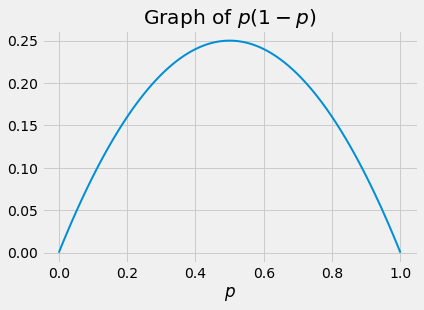

In [7]:
p = np.arange(0, 1.01, 0.01)
plt.plot(p, p*(1-p), lw=2)
plt.xlabel('$p$')
plt.title('Graph of $p(1-p)$');

The maximum value is 0.25 is at $p=0.5$. That is, $\sqrt{pq} \le 0.5$ and is equal to 0.5 at $p=0.5$. We say that the fair coin is the most variable of all coins.

- The variance of the Poisson $(\mu)$ distribution is $\sqrt{\mu}$. We didn't show this in class because I was waiting till we got to the binomial, but it's [in the previous Chapter](http://prob140.org/textbook/Chapter_12/01_Definition.html#Poisson). Now that you know the variance of the binomial, the $\sqrt{\mu}$ makes sense:

    - One way the Poisson $(\mu)$ arises is as an approximation to binomial $(n, p)$ where $n$ is large, $p$ is small, and $np = \mu$.
    - In this situation, the mean of the binomial is $np = \mu$ which is the mean of the approximating Poisson.
    - The SD of the binomial is $\sqrt{npq} \approx \sqrt{np}$ because $p \approx 0$ and hence $q \approx 1$.
    - But $np = \mu$, so $\sqrt{np} = \sqrt{\mu}$ which is the SD of the approximating Poisson.

## Vitamins ##

Use the code cell below as needed.

**1.** Let $X$ be the number of sixes in 60 rolls of a die. Find $E(X)$ and $SD(X)$.

**2.** True or false: $Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + Cov(X,Y) + Cov(Y,Z) + Cov(X,Z)$.

**3.** Suppose the weights of 7 people in an elevator are i.i.d. with mean 140 pounds and SD 20 pounds. Find the expectation and SD of the total weight of the 7 people (in pounds), from among the following options:

- $140$
- $7 \times 140$
- $7 \times 20$
- $\sqrt{7} \times 20$
- $7 \times \sqrt{20}$
- $7 \times 20^2$

In [ ]:
# scratch work for vitamins


## Break time. Dependent indicators and the hypergeometric coming up. ##

### Note on Review Set ###
In [Review Set 3](http://prob140.org/textbook/Chapter_15/06_Review_Problems_Set_3.html) you can now do Exercises 14-21.